<br>

## Data Prep & Modeling

<br>

## Data Prep

In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.color_palette()
import matplotlib.pyplot as plt
import warnings
import shap
shap.initjs() # There is a part of Shap tha Java Script is used 
warnings.filterwarnings("ignore")
import hyperopt as hp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

class color: # para formatar os prints
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
# Importing the data
df = pd.read_excel(r"C:\Users\013809631\Box\Shape_Case\O&G Equipment Data.xlsx")

print(df.shape)
df.head()

(800, 10)


,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False


In [3]:
# Understanding the types of the columns
df.dtypes

Cycle            int64
Preset_1         int64
Preset_2         int64
Temperature    float64
Pressure       float64
VibrationX     float64
VibrationY     float64
VibrationZ     float64
Frequency      float64
Fail              bool
dtype: object

In [4]:
# Whatching the distribution of the target variable
df['Fail'].value_counts()

False    734
True      66
Name: Fail, dtype: int64

In [5]:
# Transforming the Boolean variable into numeric
def trat_fail (dado):
    if dado == True:
        return 1
    else:
        return 0
    

df['Fail'] = df['Fail'].apply(trat_fail)
df['Fail'].value_counts()

0    734
1     66
Name: Fail, dtype: int64

In [6]:
# Now all the variables are numeric
df.head()

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,0
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,0
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,0
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,0
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,0


In [7]:
# Eliminating the Cycle variable, as it can get in the way more than help the model
df.drop(columns=['Cycle'],inplace = True)

In [8]:
# Now I'm applying the get dummies function, to column the categorical variables except our target (Fail)
df = pd.get_dummies(df, columns=['Preset_1', 'Preset_2'])
df.head()

,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail,Preset_1_1,Preset_1_2,Preset_1_3,Preset_2_1,Preset_2_2,Preset_2_3,Preset_2_4,Preset_2_5,Preset_2_6,Preset_2_7,Preset_2_8
0,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,0,0,0,1,0,0,0,0,0,1,0,0
1,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,0,0,1,0,0,0,0,1,0,0,0,0
2,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,0,0,1,0,1,0,0,0,0,0,0,0
3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,0,0,1,0,0,0,1,0,0,0,0,0
4,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,0,0,1,0,0,0,0,0,1,0,0,0


In [9]:
# Using Traing, Test, Split, I can separate the values in training and test samples in a way that  matches the original population of the data base

# Selecting only the independent variables
X = df.drop('Fail', axis=1)
# Selecting only the dependent variables (target)
y = df['Fail']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

# Plotting the shape of each one of the above variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 17), (240, 17), (560,), (240,))

In [10]:
# Normalizing the data, because that way we will have all the variables on the same scale

# Instatiating the Standard Scaler to normalize the data
scaler = StandardScaler()

# Applying the scalling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.77547635, -0.13527369, -0.13538808, ..., -0.37796447,
        -0.40824829, -0.37176791],
       [-0.50996507, -0.50411261,  0.51302655, ..., -0.37796447,
        -0.40824829, -0.37176791],
       [ 0.31734036,  0.1787022 , -0.40843597, ..., -0.37796447,
        -0.40824829, -0.37176791],
       ...,
       [ 0.12784415,  0.46246793, -0.3350288 , ..., -0.37796447,
         2.44948974, -0.37176791],
       [ 1.16067846, -0.33776904,  0.27793533, ...,  2.64575131,
        -0.40824829, -0.37176791],
       [ 0.25417983, -0.15863233,  0.0410238 , ..., -0.37796447,
        -0.40824829, -0.37176791]])

<br>

# Data Modeling

The models are ranked from worse to best. In this specific case, I'm focusing on the Recall metric of the True. I'm doing this because I want to minimize the False Negatives as much as possible (since in this case I want the model to miss True values of the target variable as little as possible)

<br>

## • 4th place - KNN (K Nearest Neighbors) Classifier

<br>

### KNN Classifier (Without Tunning)

In [11]:
# Instantiating the k nearest neighbors model
model_KNN = KNeighborsClassifier()

# Fitting data to train the model
model_KNN.fit(X_train,y_train)

# Predicting the Y values of the variable X_test
y_pred_KNN = model_KNN.predict(X_test)

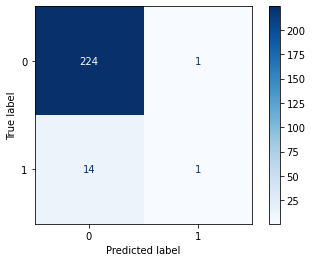

In [12]:
plot_confusion_matrix(model_KNN, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()
#top left -> True Negatives, False values (inverse to target metric), which were correctly identified
#upper right -> False Positives, which returns False values that the model identified as True values
#bottom left -> False Negatives, which returns the number of True values that the model identified as false
#bottom right -> True Positives, which returns the True values the model dentified correctly

In [13]:
# As we can see, the model is going pretty bad with the target results
print(classification_report(y_test,y_pred_KNN, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       225
        True       0.50      0.07      0.12        15

    accuracy                           0.94       240
   macro avg       0.72      0.53      0.54       240
weighted avg       0.91      0.94      0.91       240



### KNN Classifier (Tunned)

In [14]:
# defining the parameters grid for KNN Classifier
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# defining grid search to run the model with Cross Validation
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

# Using Cross Validation to run the model with 5 folds and 3 repetitions
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Running the model with Grid Search to see which estimator is going to be the best for each parameter and runing the CV too
grid_search = GridSearchCV(estimator=model_KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.943750 using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.939583 (0.017628) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.939583 (0.017628) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.943750 (0.011180) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.943750 (0.011180) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.941667 (0.015253) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.942083 (0.016051) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.940417 (0.015115) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.938750 (0.015343) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.939167 (0.016843) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.938333 (0.014767) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.937083 (

In [15]:
# Applying the tunned parameters to the new model  
Model_KNN_tunned = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='uniform')

# Fitting the model 
Model_KNN_tunned.fit(X_train,y_train)

# Running the prediction 
y_pred_KNN_tunned = Model_KNN_tunned.predict(X_test)

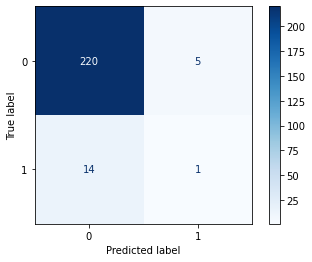

In [16]:
plot_confusion_matrix(Model_KNN_tunned, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [17]:
# As we can see, the model with the tunning parameters didn't change anything
print(classification_report(y_test,y_pred_KNN_tunned, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       225
        True       0.17      0.07      0.10        15

    accuracy                           0.92       240
   macro avg       0.55      0.52      0.53       240
weighted avg       0.89      0.92      0.90       240



<br>

## • 3rd place - Logistic Regression

<br>

### Logistic Regression (Without Tunning)

In [18]:
# Instantiating the Linear Regression model
Model_LR = LogisticRegression(random_state=0)

# Fitting data to train the model 
Model_LR.fit(X_train,y_train)

# Predicting the Y values of the variable X_test
y_pred_LR = Model_LR.predict(X_test)

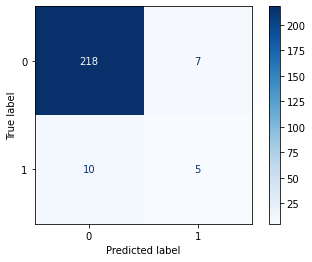

In [19]:
plot_confusion_matrix(Model_LR, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [20]:
# As we can see, the model isn't going pretty well with the target results
print(classification_report(y_test,y_pred_LR, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       225
        True       0.42      0.33      0.37        15

    accuracy                           0.93       240
   macro avg       0.69      0.65      0.67       240
weighted avg       0.92      0.93      0.93       240



### Logistic Regression (Tunned)

In [21]:
# defining the parameters grid for the Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Creating the Logistic Regression model
Model_LR_tunned = LogisticRegression(random_state=0, max_iter=200)

# defining grid search to run the model with Cross Validation
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# Using Cross Validation to run the model with 5 folds and 3 repetitions
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Running the model with Grid Search to see which estimator is going to be the best for each parameter and runing the CV too
grid_search = GridSearchCV(estimator=Model_LR_tunned, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.937917 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.936250 (0.014289) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936250 (0.014825) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935417 (0.015422) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.936250 (0.014289) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.935000 (0.015104) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935833 (0.013004) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.935417 (0.012004) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934583 (0.013857) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.937917 (0.008058) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.933750 (0.016105) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.933750 (0.016105) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920417 (0.006641) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.934167 (0.015789) wit

In [22]:
# Applying the tunned parameters to the instantiated model  
Model_LR_tunned = LogisticRegression(random_state=0, max_iter=200, C=1.0, penalty='l2', solver='liblinear')

# Fitting data to train the model 
Model_LR_tunned.fit(X_train,y_train)

# Running the prediction 
y_pred_LR_tunned = Model_LR_tunned.predict(X_test)

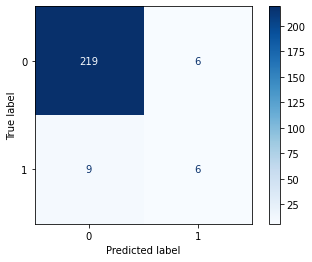

In [23]:
plot_confusion_matrix(Model_LR_tunned, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [24]:
# Now with the tunned parameteres, the model is a little bit better on the target results
print(classification_report(y_test,y_pred_LR_tunned, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       225
        True       0.50      0.40      0.44        15

    accuracy                           0.94       240
   macro avg       0.73      0.69      0.71       240
weighted avg       0.93      0.94      0.93       240



<br>

## • 2nd place - Random Forest Classifier

<br>

### Random Forest Classifier (Without Tunning)

In [25]:
# Instantiating the Random Forest Classifier model
model_RF = RandomForestClassifier(random_state=4)

# Fitting data to train the model
model_RF.fit(X_train,y_train)

# Predicting the Y values of the variable X_test
y_pred_RF = model_RF.predict(X_test)

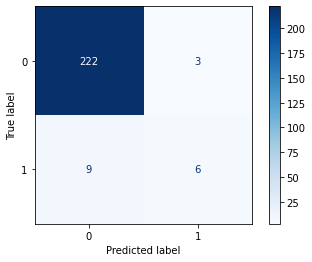

In [26]:
plot_confusion_matrix(model_RF, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [27]:
# As we can see, the model is a little bit better than the other 2 above, having higher results at the target values
print(classification_report(y_test,y_pred_RF, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       225
        True       0.67      0.40      0.50        15

    accuracy                           0.95       240
   macro avg       0.81      0.69      0.74       240
weighted avg       0.94      0.95      0.94       240



### Random Forest Classifier (Tunned)

In [28]:
# defining the parameters grid for Random Forest Classifier
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# defining grid search to run the model with Cross Validation
grid = dict(n_estimators=n_estimators,max_features=max_features)

# Using Cross Validation to run the model with 5 folds and 3 repetitions
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Running the model with Grid Search to see which estimator is going to be the best for each parameter and runing the CV too
grid_search = GridSearchCV(estimator=model_RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942083 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.938333 (0.014228) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.940417 (0.012047) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.942083 (0.011517) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.938333 (0.014228) with: {'max_features': 'log2', 'n_estimators': 10}
0.940417 (0.012047) with: {'max_features': 'log2', 'n_estimators': 100}
0.942083 (0.011517) with: {'max_features': 'log2', 'n_estimators': 1000}


In [29]:
# Applying the tunned parameters to the new model  
Model_RF_tunned = RandomForestClassifier(max_features='sqrt', n_estimators=1000)

# Fitting the model 
Model_RF_tunned.fit(X_train,y_train)

# Running the prediction 
y_pred_RF_tunned = Model_RF_tunned.predict(X_test)

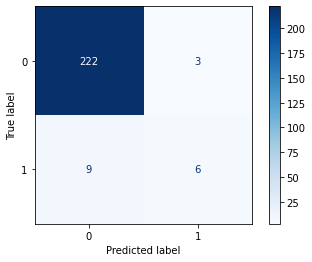

In [30]:
plot_confusion_matrix(Model_RF_tunned, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [31]:
# As we can see, the results are the same as the non tunned random forest model 
print(classification_report(y_test,y_pred_RF_tunned, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       225
        True       0.67      0.40      0.50        15

    accuracy                           0.95       240
   macro avg       0.81      0.69      0.74       240
weighted avg       0.94      0.95      0.94       240



<br>

## • 1st place - XGBoost Classifier

<br>

The best model was the XGBoost Classifier without tunning (with the standard parameters and the Cross Validation applied)

- 95% of Accuracy;

- 47% Recall of the True values (my main focus).


### The above results were achieved without the undersampling technique that is going to be used further ahead.

<br>

### XGBoost Classifier (Without Tunning)

In [32]:
# Defining the parameters to the cross validation technique
folds = 5
n_repeats = 3
param_comb = 5

# Instantiating the CV technique
cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=n_repeats, random_state=0)

# Instantiating the XGBoost model
model_xgb = XGBClassifier(random_state = 42, use_label_encoder=False, cv=cv.split(X,y))

# Fitting data to train the model
model_xgb.fit(X_train,y_train)

# Predicting the Y values of the variable X_test
y_pred_xgb = model_xgb.predict(X_test)

[22:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


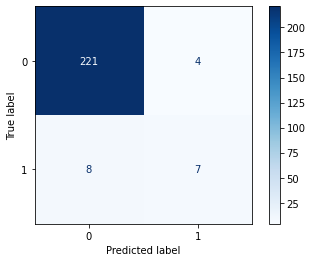

In [33]:
plot_confusion_matrix(model_xgb, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [34]:
# As we can see, the XGBoost model is having better results at the target values than the others without tunning
print(classification_report(y_test,y_pred_xgb, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       225
        True       0.64      0.47      0.54        15

    accuracy                           0.95       240
   macro avg       0.80      0.72      0.76       240
weighted avg       0.94      0.95      0.95       240



### XGBoost Classifier (Tunned)

In [35]:
# defining the parameters grid for XGBoost Classifier
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [36]:
# Instantiating the XGBoost model one more time, because the above model have already been Cross Validated 
model_xgb_tunned = XGBClassifier(random_state = 42, use_label_encoder=False)

# Defining the parameters to the cross validation technique
folds = 5
n_repeats = 3
param_comb = 5

# Instantiating the CV technique
cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=n_repeats, random_state=0)

# Instantiating the Randomized Search and setting the params
random_search = RandomizedSearchCV(model_xgb_tunned, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=cv.split(X,y), verbose=False, random_state=1001)

# Fitting the X and y in random search
random_search.fit(X, y)

[22:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _RepeatedSplits.split at 0x0000014113C66040>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=No...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           use_

In [37]:
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best normalized gini score for 5-fold search with 5 parameter combinations:
0.9336317737491908

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}


In [38]:
# Defining the parameters to the cross validation technique
folds = 5
n_repeats = 3
param_comb = 5

cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=n_repeats, random_state=0)

model_xgb_tunned = XGBClassifier(random_state = 42, use_label_encoder=False, cv=cv.split(X,y),subsample=0.8, min_child_weight=5, max_depth=5, gamma=1, colsample_bytree=0.8)

model_xgb_tunned.fit(X_train,y_train)

y_pred_xgb_tunned = model_xgb_tunned.predict(X_test)

[22:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


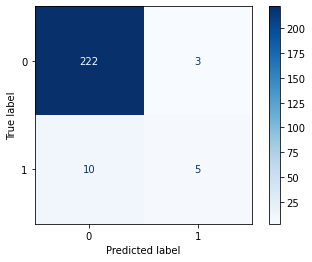

In [39]:
# In this specific case, the tunned parameters are worse than the standard XGBoost parameters
plot_confusion_matrix(model_xgb_tunned, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [40]:
# In this specific case, the tunned parameters are worse than the standard XGBoost parameters
print(classification_report(y_test,y_pred_xgb_tunned, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       225
        True       0.62      0.33      0.43        15

    accuracy                           0.95       240
   macro avg       0.79      0.66      0.70       240
weighted avg       0.94      0.95      0.94       240



<br>

## Trying the Undersampling technique on the best model of the above

As we can see, the XGBoost model (a great model for classification) has good results with the False values of the target, but not very good results with the True values (my main focus). So I'm going to use the undersampling technique to reduce the amount of false values and make both values (False and True) stay in almost the same size. Decreasing the False values will train the algorithm on a number of False and True pairs, so I'll probably have a better chance of getting the model to predict correctly. With this technique, I'm not training the model with many more values from one category than from another.

In [46]:
from imblearn.under_sampling import RandomUnderSampler 

under = RandomUnderSampler()
X = df.drop('Fail',axis=1)
y = df['Fail']
X,y = under.fit_resample(X,y)
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1) # split

# Plotting the shape of each one of the above variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 17), (40, 17), (92,), (40,))

In [53]:
# With the undersampling technique, the False values are almost the same as the True values, helping the model to train with the data correctly separated
np.bincount(y_train)

array([45, 47], dtype=int64)

In [54]:
# Instantiating the CV technique
cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=n_repeats, random_state=0)

# Instantiating the XGB Classifier model and setting some params
model_xgb_under = XGBClassifier(random_state = 42, use_label_encoder=False, cv=cv.split(X,y))

# Fitting data to train the model
model_xgb_under.fit(X_train,y_train)

# Predicting the Y values of the variable X_test
y_pred_xgb_under = model_xgb_under.predict(X_test)

[22:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


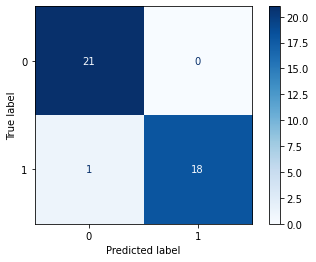

In [55]:
plot_confusion_matrix(model_xgb_under, X_test, y_test,cmap='Blues')  
plt.grid(False)
plt.show()

In [56]:
# The model had a sensational performance with the undersampling technique
print(classification_report(y_test,y_pred_xgb_under, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.95      1.00      0.98        21
        True       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



<br>

# Prescriptive Analysis

In [47]:
# Instantiating the explainer algorithm to calculate the importance of each dataframe feature
explainer = shap.Explainer(model_xgb_under)

# Running the explainer algorithm to have access to the X_test variables and values
shap_values = explainer(X_test)

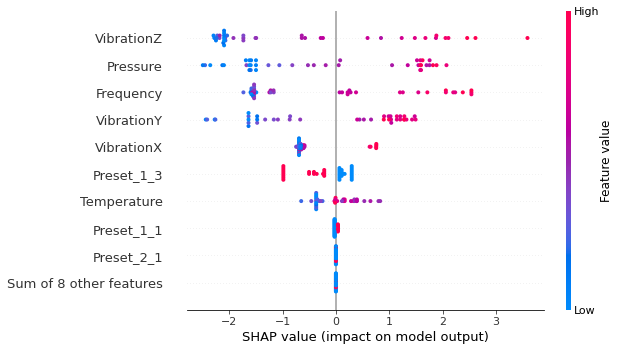

In [48]:
# This swarm plot shows the force/importance of each feature on the XGBoost model, where we can see their level of importance. 
shap.plots.beeswarm(shap_values)

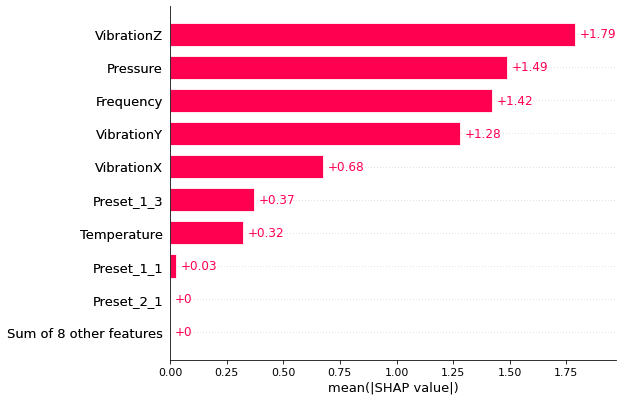

In [49]:
# This plot shows us the importance of the variables with bars and we can see how much each one of them impacts the model specificaly
shap.plots.bar(shap_values)

<br>

<hr>